In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
zakhar_table = pd.read_csv('data.csv')

In [4]:
zakhar_table.head()

,event_id,event_date,customer_id,is_attend,group_ids,teacher_ids,attendance_id
0,5,2020-05-22,47,1,2,6,12
1,15,2020-06-03,354,1,5,4,57
2,34,2020-06-17,183,1,5,4,158
3,22,2020-06-11,12,1,1,3,95
4,36,2020-06-19,260,1,5,4,185


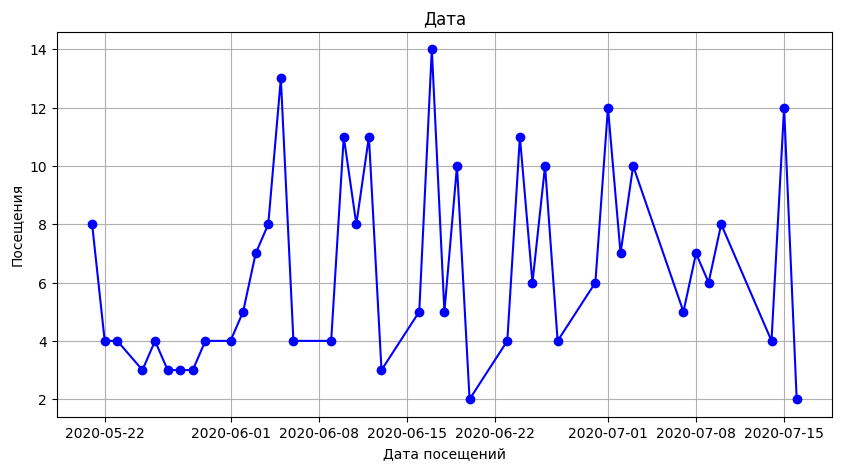

In [5]:
zakhar_table["event_date"] = pd.to_datetime(zakhar_table["event_date"])

attendance_by_date = zakhar_table.groupby("event_date")["is_attend"].sum()

plt.figure(figsize=(10, 5))
plt.plot(attendance_by_date.index, attendance_by_date.values, marker='o', linestyle='-', color='b')
plt.xlabel("Дата посещений")
plt.ylabel("Посещения")
plt.title("Дата")
plt.grid()

plt.show()

Видим, что посещение клиентов по дням периодическое. Видимо они ходят чаще на выходных

In [30]:
attendance_by_customer = zakhar_table.groupby("customer_id")["is_attend"].sum()

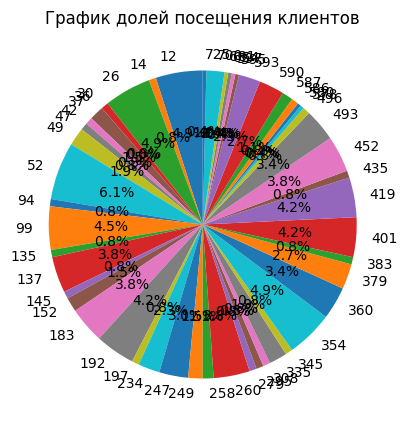

In [16]:
plt.figure(figsize=(10, 5))
plt.pie(attendance_by_customer.values, labels=attendance_by_customer.index,autopct='%1.1f%%',  startangle=90)
plt.title("График долей посещения клиентов")
plt.grid()

plt.show()

График загромождённый и мы видим, что посещение по клиентам примерно равномерное. Нет завсегдатаев

In [26]:
TOP_NUMBER = 10
top = attendance_by_customer.sort_values(ascending=False)[:TOP_NUMBER]

In [27]:
others_sum = attendance_by_customer.iloc[TOP_NUMBER:].sum()
top["Others"] = others_sum

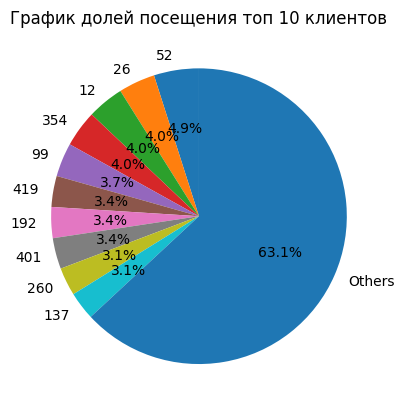

In [31]:
plt.pie(top, labels=top.index, autopct='%1.1f%%',  startangle=90)

plt.title('График долей посещения топ {} клиентов'.format(TOP_NUMBER))
plt.show()